**Import required libraries**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.api import add_constant
import statsmodels.api as sm

#**Load the data frame**

In [2]:
df = pd.read_csv("/content/sample_data/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#**Cheak the null values**

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
radio,0
newspaper,0
sales,0


#**Plot the sales vs ads**

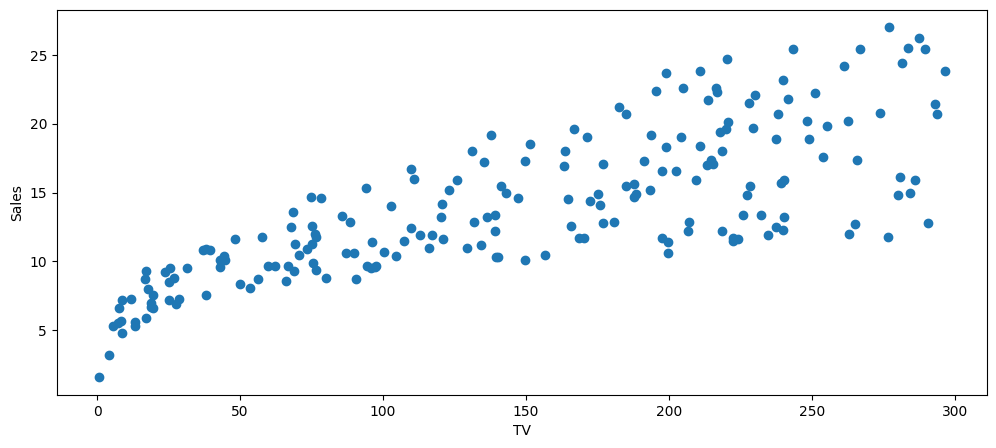

In [11]:
plt.figure(figsize=(12,5))
plt.scatter(df["TV"], df["sales"])
#plt.plot(df['TV'], df["sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

#**Reshape the values**

In [37]:
X = df["TV"].values.reshape(-1,1)
y = df["sales"].values.reshape(-1,1)
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [15]:
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [39]:
#x = df.drop(["sales", "Unnamed: 0"], axis = 1)
y = df["sales"]
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [40]:
y_pred = reg.predict(X)
y_pred

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

#**R- squared value**

In [41]:
reg.score(X,y)

0.611875050850071

#**Print coefficint and intercept**

In [42]:
print(reg.coef_)
print(reg.intercept_)

[0.04753664]
7.032593549127695


#**Plot actual vs predicted value**

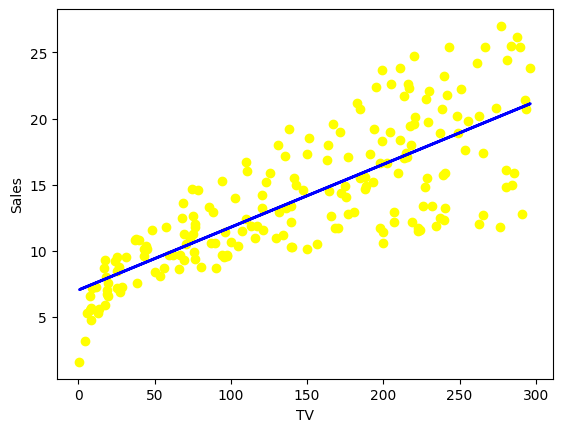

In [43]:
plt.figure()
plt.scatter(df["TV"], df["sales"], c = "yellow")
plt.plot(df["TV"], y_pred, c= "blue", linewidth = 2)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

#**Print Statistical model**

In [52]:
x = df["TV"]
y = df["sales"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 09 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        14:59:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0